In [1]:
#manipulation of data 
import pandas as pd 
import numpy as np
# visualization of data 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

Source od Dataset:
The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

- Explanatory Variables :
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors. 

Demographic: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cig arette.)

Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient ha

 Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (
ontinuous)

Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)d diabetes (Nominal)

In [2]:
#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [3]:
data = pd.read_csv("C:/Users/pc/Desktop/colaboratory/CHD/framingham.csv")

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# Identify columns that should be categorical 
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

In [7]:
# Convert these columns to categorical dtype
for col in categorical_cols:
    data[col] = data[col].astype('category')

In [8]:
num_columns = [f for f in data.columns if data.dtypes[f] != 'category']
num_columns

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4238 non-null   category
 1   age              4238 non-null   int64   
 2   education        4133 non-null   category
 3   currentSmoker    4238 non-null   category
 4   cigsPerDay       4209 non-null   float64 
 5   BPMeds           4185 non-null   category
 6   prevalentStroke  4238 non-null   category
 7   prevalentHyp     4238 non-null   category
 8   diabetes         4238 non-null   category
 9   totChol          4188 non-null   float64 
 10  sysBP            4238 non-null   float64 
 11  diaBP            4238 non-null   float64 
 12  BMI              4219 non-null   float64 
 13  heartRate        4237 non-null   float64 
 14  glucose          3850 non-null   float64 
 15  TenYearCHD       4238 non-null   category
dtypes: category(8), float64(7), int64(1)
memor

In [10]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [11]:
# Identify columns with missing values
print("\nColumns with missing values BEFORE imputation:\n", data.isnull().sum())


Columns with missing values BEFORE imputation:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [12]:
missing_values=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
male,0,0.000000
age,0,0.000000
education,105,2.477584
currentSmoker,0,0.000000
cigsPerDay,29,0.684285
BPMeds,53,1.250590
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000
totChol,50,1.179802


In [13]:
# Impute missing values using the most frequent value for categorical columns and the mean for numerical columns.
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')


In [14]:
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(include='category').columns

In [15]:
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

In [16]:
# Convert categorical columns back to numerical representation using Label Encoding (if needed for your modeling techniques)
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [17]:
# Verify that missing values have been handled
print("\nColumns with missing values AFTER imputation:\n", data.isnull().sum())


Columns with missing values AFTER imputation:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   float64
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


In [19]:
data = data.rename(columns={'male': 'Gender'})
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,3,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,1,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,2,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,2,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


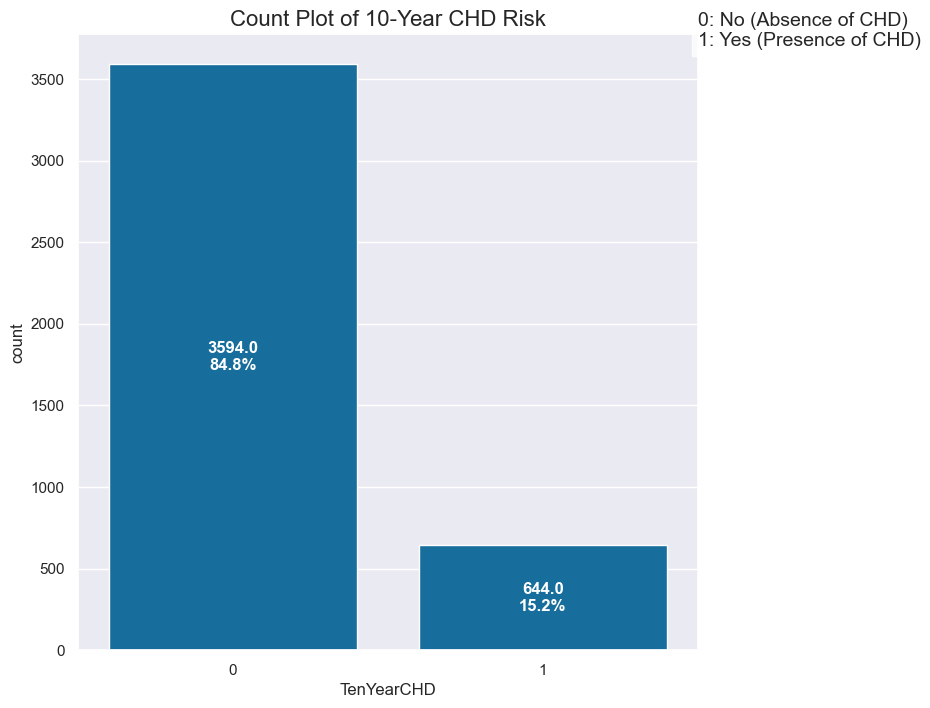

In [20]:
plt.figure(figsize=(8, 8)) 
sns.set_style("darkgrid")
ax = sns.countplot(x='TenYearCHD',data=data)
plt.title('Count Plot of 10-Year CHD Risk', fontsize=16) #Add title
# Calculate total count
total = len(data)
# Annotate bars with values and percentages (improved positioning)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height/total:.1f}%'
    ax.annotate(f'{height}\n{percentage}',
                (p.get_x() + p.get_width() / 2., height / 2), #Center vertically
                ha='center', va='center', #Center alignment
                color='white', fontsize=12, weight='bold') #Improved appearance

# Add clearer text instead of a legend (improved positioning and appearance)
plt.text(x=1.5, y=3700, s="0: No (Absence of CHD)\n1: Yes (Presence of CHD)", fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

plt.show()


In [21]:
def create_countplot(data, column_name, labels=None):
    """
    Generates a countplot with annotations and explanatory text for a categorical variable.

    Args:
        data: The Pandas DataFrame containing the data.
        column_name: The name of the categorical column to plot.
        labels: (Optional) A dictionary mapping values in the column to more descriptive labels.  
               e.g., {0: 'No', 1: 'Yes'}
    """
    plt.figure(figsize=(8, 8))
    sns.set_style("darkgrid")
    ax = sns.countplot(x=column_name, data=data)
    plt.title(f'Count Plot of {column_name}', fontsize=16)

    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height/total:.1f}%'
        ax.annotate(f'{height}\n{percentage}',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='center',
                    color='white', fontsize=12, weight='bold')

    # Add explanatory text (adjust position as needed)
    if labels:
        text_y = max(p.get_height() for p in ax.patches) * 0.8
        text_str = "\n".join([f"{k}: {v}" for k, v in labels.items()])
        plt.text(x=len(data[column_name].unique()) / 2, y=text_y, s=text_str,ha='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

    # Adjust y-axis limits to better show smaller bars
    plt.ylim(0, max(p.get_height() for p in ax.patches) * 1.2) #Increase upper limit

    plt.show()


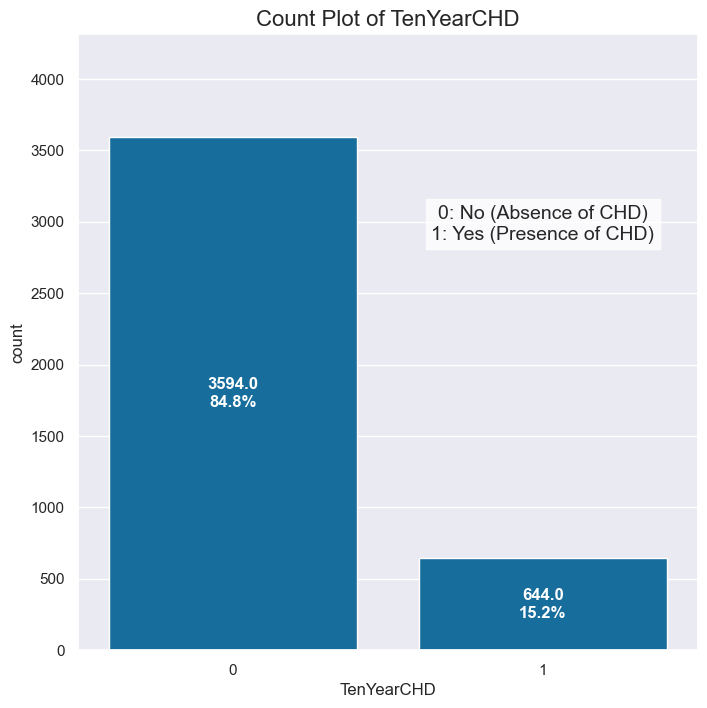

In [22]:
create_countplot(data, 'TenYearCHD', {0: 'No (Absence of CHD)', 1: 'Yes (Presence of CHD)'})  #For the 'TenYearCHD' column

In [23]:
categorical_cols

Index(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

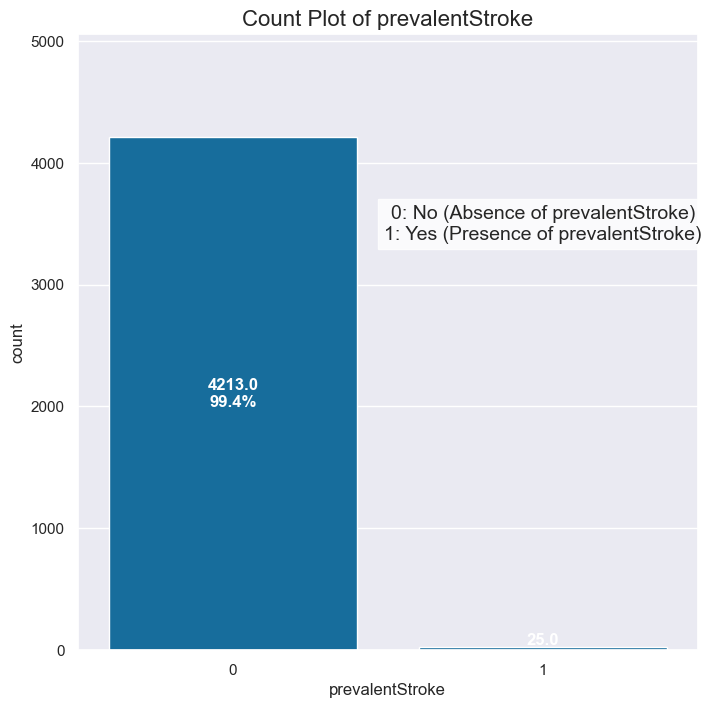

In [24]:
create_countplot(data, 'prevalentStroke', {0: 'No (Absence of prevalentStroke)', 1: 'Yes (Presence of prevalentStroke)'}) 

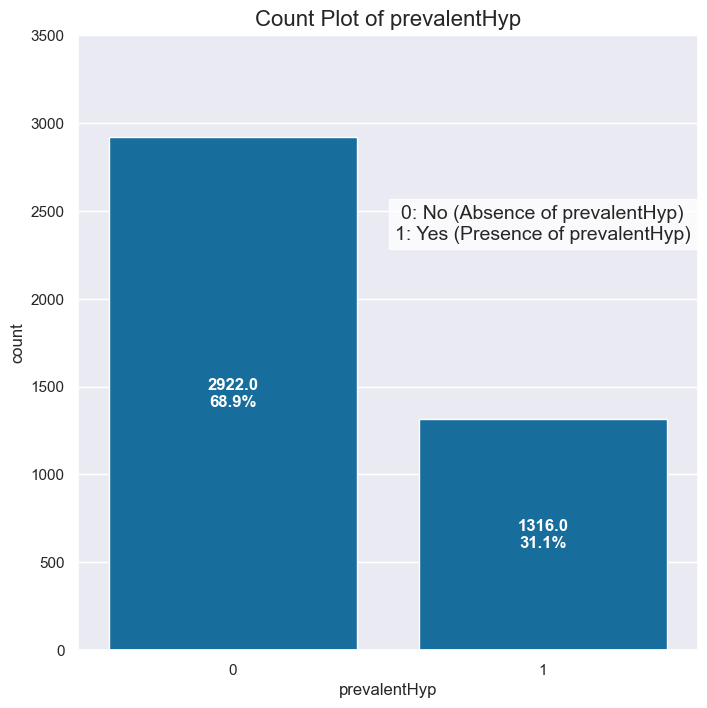

In [25]:
create_countplot(data, 'prevalentHyp', {0: 'No (Absence of prevalentHyp)', 1: 'Yes (Presence of prevalentHyp)'}) 

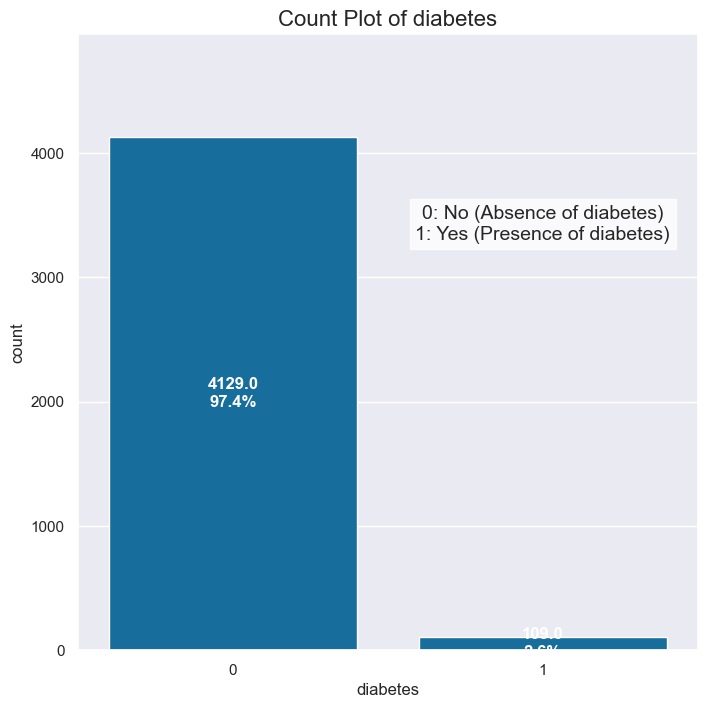

In [26]:
create_countplot(data, 'diabetes', {0: 'No (Absence of diabetes)', 1: 'Yes (Presence of diabetes)'}) 

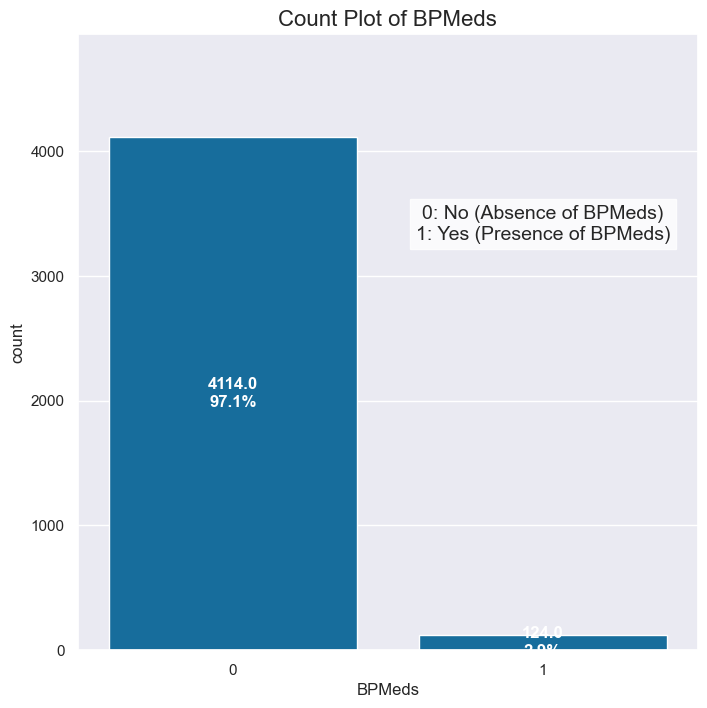

In [27]:
create_countplot(data, 'BPMeds', {0: 'No (Absence of BPMeds)', 1: 'Yes (Presence of BPMeds)'}) 

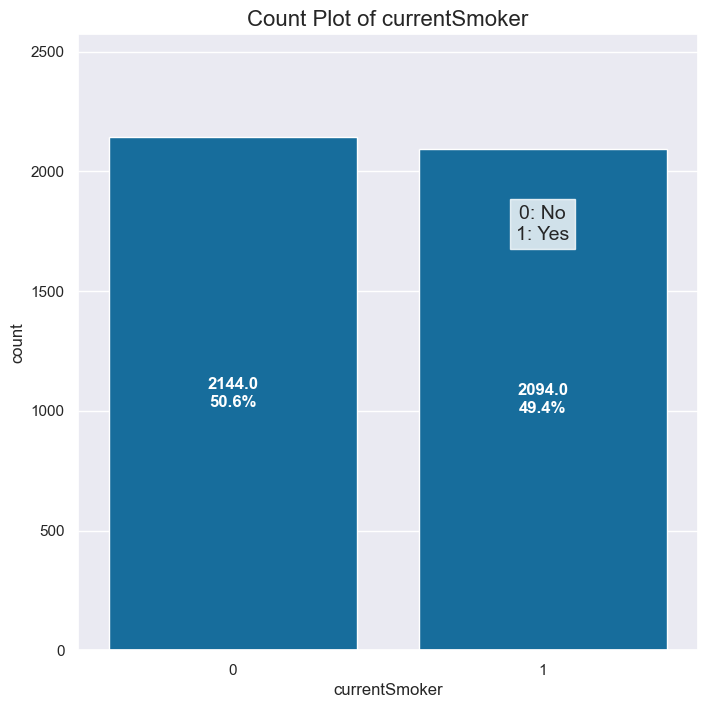

In [28]:
create_countplot(data, 'currentSmoker', {0: 'No', 1: 'Yes'}) 

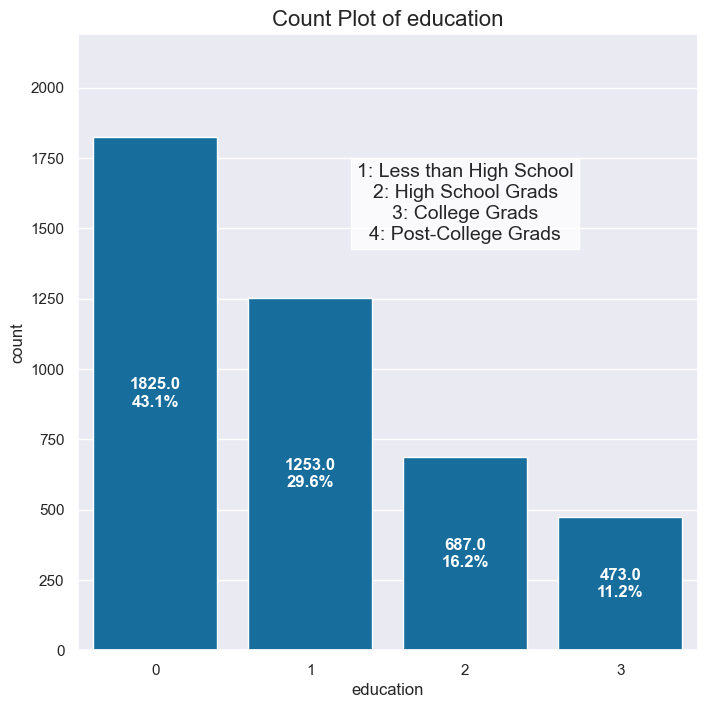

In [29]:
create_countplot(data, 'education', {1: 'Less than High School', 2: 'High School Grads', 3: 'College Grads', 4: 'Post-College Grads'}) 

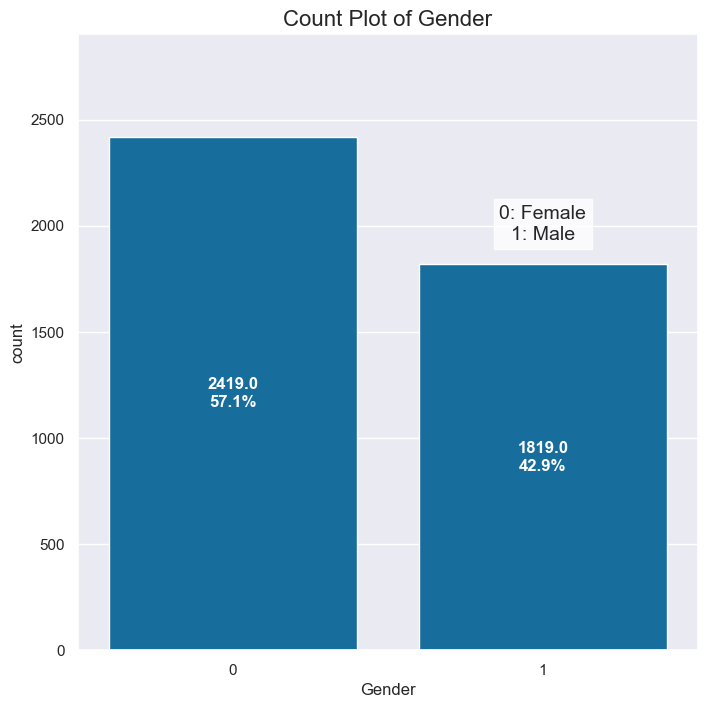

In [30]:
create_countplot(data, 'Gender', {0: 'Female', 1: 'Male'}) 

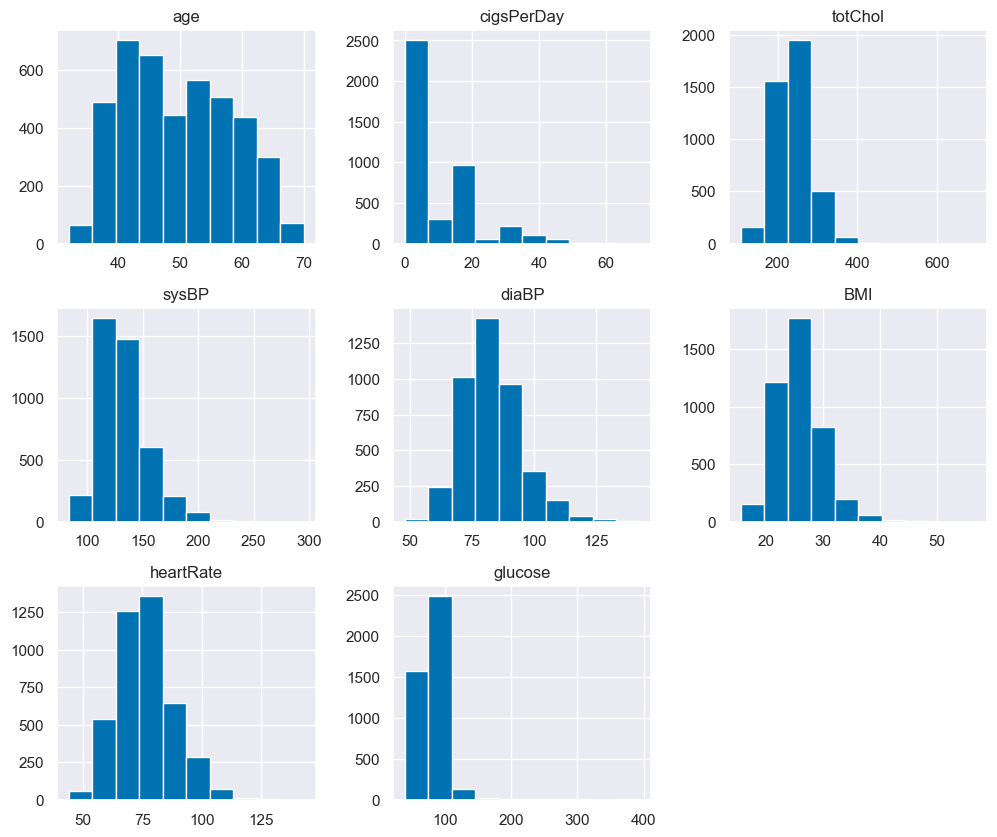

In [31]:
# 3.1 Histograms of numerical features
data[numerical_cols].hist(figsize=(12, 10))
plt.show()

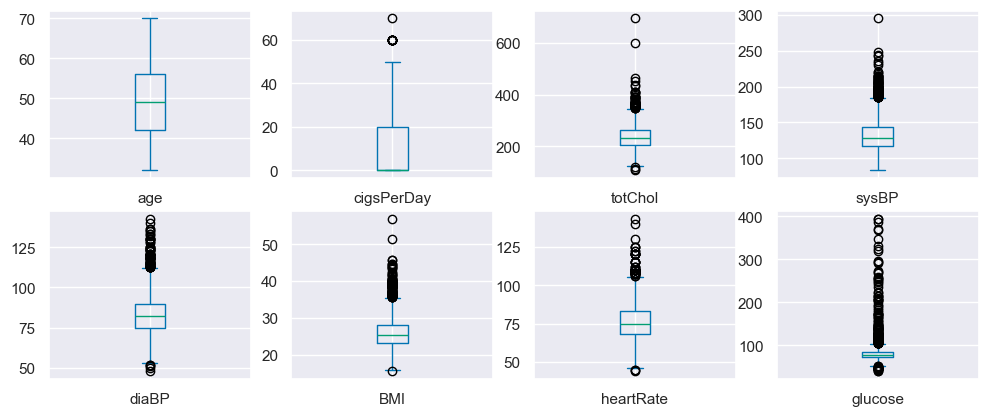

In [32]:
# 3.2 Boxplots to visualize outliers
data[numerical_cols].plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()

In [33]:
def detect_outliers(data, column_name, method='IQR'):
    """Detects outliers in a column using IQR or Z-score method."""
    if method == 'IQR':
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    elif method == 'Z-score':
        z = np.abs((data[column_name] - data[column_name].mean()) / data[column_name].std())
        outliers = data[z > 3] #Typically, z-scores > 3 are considered outliers.
    else:
        raise ValueError("Invalid method. Choose 'IQR' or 'Z-score'.")
    return outliers

#To get counts and percentages:
for col in numerical_cols: #Add your columns
    outliers_count = len(detect_outliers(data, col))
    total_count = len(data)
    outlier_percentage = (outliers_count / total_count) * 100
    print(f"Outliers in {col}: Count = {outliers_count}, Percentage = {outlier_percentage:.2f}%")

Outliers in age: Count = 0, Percentage = 0.00%
Outliers in cigsPerDay: Count = 12, Percentage = 0.28%
Outliers in totChol: Count = 57, Percentage = 1.34%
Outliers in sysBP: Count = 126, Percentage = 2.97%
Outliers in diaBP: Count = 81, Percentage = 1.91%
Outliers in BMI: Count = 97, Percentage = 2.29%
Outliers in heartRate: Count = 76, Percentage = 1.79%
Outliers in glucose: Count = 262, Percentage = 6.18%


In [34]:
from scipy.stats.mstats import winsorize
# Transformations
for col in ['cigsPerDay', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose']:
    data[col + '_log'] = np.log1p(data[col])  # Log transformation

    # Winsorize after log transformation
    data[col + '_log_winsorized'] = winsorize(data[col + '_log'], limits=[0, 0.05]) # Adjust limits as needed

    # Re-evaluate outliers AFTER both transformations
    outliers_log_winsorized = detect_outliers(data, col + '_log_winsorized')
    outliers_count = len(outliers_log_winsorized)
    outlier_percentage = (outliers_count / len(data)) * 100
    print(f"Outliers in {col}_log_winsorized: Count = {outliers_count}, Percentage = {outlier_percentage:.2f}%")


Outliers in cigsPerDay_log_winsorized: Count = 0, Percentage = 0.00%
Outliers in totChol_log_winsorized: Count = 15, Percentage = 0.35%
Outliers in diaBP_log_winsorized: Count = 18, Percentage = 0.42%
Outliers in BMI_log_winsorized: Count = 15, Percentage = 0.35%
Outliers in heartRate_log_winsorized: Count = 32, Percentage = 0.76%
Outliers in glucose_log_winsorized: Count = 46, Percentage = 1.09%


In [35]:
#Winsorize as outliers still exist after log transformation 
data[col + '_log_winsorized'] = winsorize(data[col + '_log'], limits=[0, 0.05])

In [36]:
#Handle sysBP separately (Winsorize only)
data['sysBP_winsorized'] = winsorize(data['sysBP'], limits=[0, 0.05])
outliers_sysBP_winsorized = detect_outliers(data, 'sysBP_winsorized')
outliers_count = len(outliers_sysBP_winsorized)
outlier_percentage = (outliers_count / len(data)) * 100
print(f"Outliers in sysBP_winsorized: Count = {outliers_count}, Percentage = {outlier_percentage:.2f}%")

Outliers in sysBP_winsorized: Count = 0, Percentage = 0.00%


In [37]:
data.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'cigsPerDay_log',
       'cigsPerDay_log_winsorized', 'totChol_log', 'totChol_log_winsorized',
       'diaBP_log', 'diaBP_log_winsorized', 'BMI_log', 'BMI_log_winsorized',
       'heartRate_log', 'heartRate_log_winsorized', 'glucose_log',
       'glucose_log_winsorized', 'sysBP_winsorized'],
      dtype='object')

*   **Original Variables:**  Generally easier to interpret.  The coefficients in logistic regression directly reflect the impact of the original variables.
*   **Transformed Variables:**  More difficult to interpret directly.  The impact of a log-transformed variable is not as intuitive.
*   If the original variables are highly skewed, the transformed variables might lead to improved model performance because they address the skewness and reduce the influence of outliers.  Logistic regression, in particular, assumes that the predictors have a roughly normal distribution.
*   Logistic regression can be sensitive to outliers.  If outliers significantly affect the model's performance, using the winsorized variables might be beneficial.
*   Decision trees are generally more robust to outliers.  The impact of using transformed variables might be less significant.

i will Start by building models with both sets of variables (original and transformed). Compare their performance using appropriate evaluation metrics and cross-validation. If the transformed variables lead to significantly better performance, use them. However, keep in mind the trade-off between improved performance and reduced interpretability. If the performance difference is marginal, prioritize the original variables for better interpretability. Document your findings thoroughly.

In [38]:
categorical_cols = data[['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']]
Original_number_cols = data[['age','cigsPerDay', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose', 'sysBP']]
Transformed_number_cols = data[['age','cigsPerDay_log_winsorized', 'totChol_log_winsorized', 'diaBP_log_winsorized', 'BMI_log_winsorized', 'heartRate_log_winsorized', 'glucose_log_winsorized', 'sysBP_winsorized']]

In [39]:
categorical_cols

,Gender,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,3,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0
3,0,2,1,0,0,1,0,1
4,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4233,1,0,1,0,0,1,0,1
4234,1,2,1,0,0,0,0,0
4235,0,1,1,0,0,0,0,0
4236,0,0,1,0,0,0,0,0


In [40]:
Original_number_cols

,age,cigsPerDay,totChol,diaBP,BMI,heartRate,glucose,sysBP
0,39.0,0.0,195.0,70.0,26.97,80.0,77.0,106.0
1,46.0,0.0,250.0,81.0,28.73,95.0,76.0,121.0
2,48.0,20.0,245.0,80.0,25.34,75.0,70.0,127.5
3,61.0,30.0,225.0,95.0,28.58,65.0,103.0,150.0
4,46.0,23.0,285.0,84.0,23.10,85.0,85.0,130.0
...,...,...,...,...,...,...,...,...
4233,50.0,1.0,313.0,92.0,25.97,66.0,86.0,179.0
4234,51.0,43.0,207.0,80.0,19.71,65.0,68.0,126.5
4235,48.0,20.0,248.0,72.0,22.00,84.0,86.0,131.0
4236,44.0,15.0,210.0,87.0,19.16,86.0,78.0,126.5


In [41]:
Transformed_number_cols

,age,cigsPerDay_log_winsorized,totChol_log_winsorized,diaBP_log_winsorized,BMI_log_winsorized,heartRate_log_winsorized,glucose_log_winsorized,sysBP_winsorized
0,39.0,0.000000,5.278115,4.262680,3.331133,4.394449,4.356709,106.0
1,46.0,0.000000,5.525453,4.406719,3.392157,4.564348,4.343805,121.0
2,48.0,3.044522,5.505332,4.394449,3.271089,4.330733,4.262680,127.5
3,61.0,3.433987,5.420535,4.564348,3.387098,4.189655,4.644391,150.0
4,46.0,3.178054,5.655992,4.442651,3.182212,4.454347,4.454347,130.0
...,...,...,...,...,...,...,...,...
4233,50.0,0.693147,5.746203,4.532599,3.294725,4.204693,4.465908,175.0
4234,51.0,3.433987,5.337538,4.394449,3.030617,4.189655,4.234107,126.5
4235,48.0,3.044522,5.517453,4.290459,3.135494,4.442651,4.465908,131.0
4236,44.0,2.772589,5.351858,4.477337,3.003700,4.465908,4.369448,126.5


In [42]:
data.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'cigsPerDay_log',
       'cigsPerDay_log_winsorized', 'totChol_log', 'totChol_log_winsorized',
       'diaBP_log', 'diaBP_log_winsorized', 'BMI_log', 'BMI_log_winsorized',
       'heartRate_log', 'heartRate_log_winsorized', 'glucose_log',
       'glucose_log_winsorized', 'sysBP_winsorized'],
      dtype='object')

In [43]:
original_data = data.iloc[:, [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]  #All rows, specific columns 
original_data

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,3,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,1,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,2,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,2,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50.0,0,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51.0,2,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48.0,1,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44.0,0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [44]:
transformed_data = data.iloc[:, [0,1,2,3,5,6,7,8,15,17,19,21,23,25,27,28]]
transformed_data

,Gender,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,cigsPerDay_log_winsorized,totChol_log_winsorized,diaBP_log_winsorized,BMI_log_winsorized,heartRate_log_winsorized,glucose_log_winsorized,sysBP_winsorized
0,1,39.0,3,0,0,0,0,0,0,0.000000,5.278115,4.262680,3.331133,4.394449,4.356709,106.0
1,0,46.0,1,0,0,0,0,0,0,0.000000,5.525453,4.406719,3.392157,4.564348,4.343805,121.0
2,1,48.0,0,1,0,0,0,0,0,3.044522,5.505332,4.394449,3.271089,4.330733,4.262680,127.5
3,0,61.0,2,1,0,0,1,0,1,3.433987,5.420535,4.564348,3.387098,4.189655,4.644391,150.0
4,0,46.0,2,1,0,0,0,0,0,3.178054,5.655992,4.442651,3.182212,4.454347,4.454347,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50.0,0,1,0,0,1,0,1,0.693147,5.746203,4.532599,3.294725,4.204693,4.465908,175.0
4234,1,51.0,2,1,0,0,0,0,0,3.433987,5.337538,4.394449,3.030617,4.189655,4.234107,126.5
4235,0,48.0,1,1,0,0,0,0,0,3.044522,5.517453,4.290459,3.135494,4.442651,4.465908,131.0
4236,0,44.0,0,1,0,0,0,0,0,2.772589,5.351858,4.477337,3.003700,4.465908,4.369448,126.5


In [45]:
original_data.shape

(4238, 16)

In [46]:
transformed_data.shape

(4238, 16)

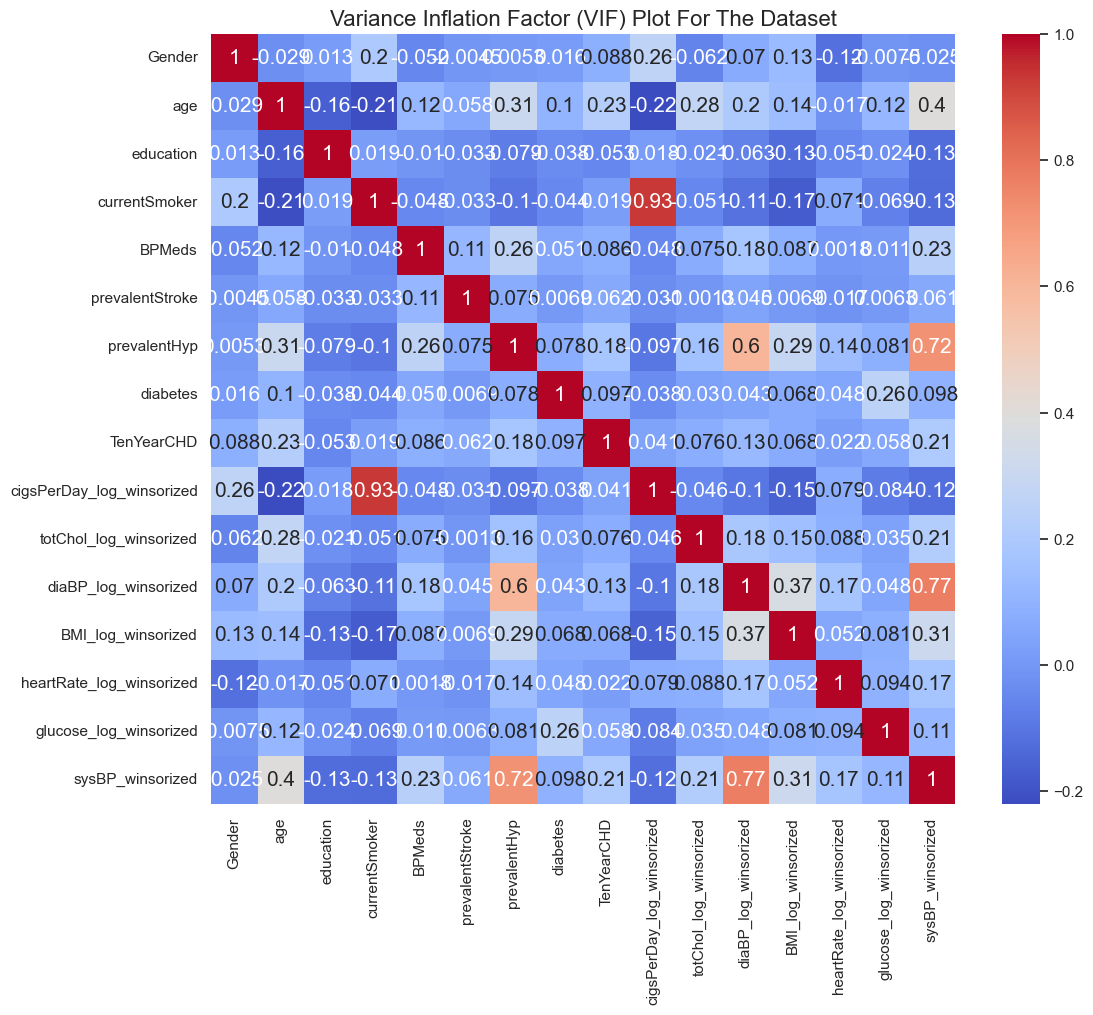

In [47]:
# 3.3 Correlation matrix
corr_matrix = transformed_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Variance Inflation Factor (VIF) Plot For The Dataset', fontsize=16) #Add title
plt.show()

In [48]:
transformed_data.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD',
       'cigsPerDay_log_winsorized', 'totChol_log_winsorized',
       'diaBP_log_winsorized', 'BMI_log_winsorized',
       'heartRate_log_winsorized', 'glucose_log_winsorized',
       'sysBP_winsorized'],
      dtype='object')

Interpreting the VIF Plot:

A general rule of thumb is that VIF values above 5 or 10 indicate high multicollinearity. Looking at this plot, several variables have VIFs far exceeding these thresholds. i need to address this before proceeding with model building.

In [49]:
transformed_data.drop(['prevalentHyp','currentSmoker','BPMeds'],axis=1, inplace=True)

In [50]:
transformed_data.drop(['diaBP_log_winsorized'],axis=1, inplace=True)

In [51]:
transformed_data.drop(['education'],axis=1, inplace=True)

In [52]:
transformed_data.columns

Index(['Gender', 'age', 'prevalentStroke', 'diabetes', 'TenYearCHD',
       'cigsPerDay_log_winsorized', 'totChol_log_winsorized',
       'BMI_log_winsorized', 'heartRate_log_winsorized',
       'glucose_log_winsorized', 'sysBP_winsorized'],
      dtype='object')

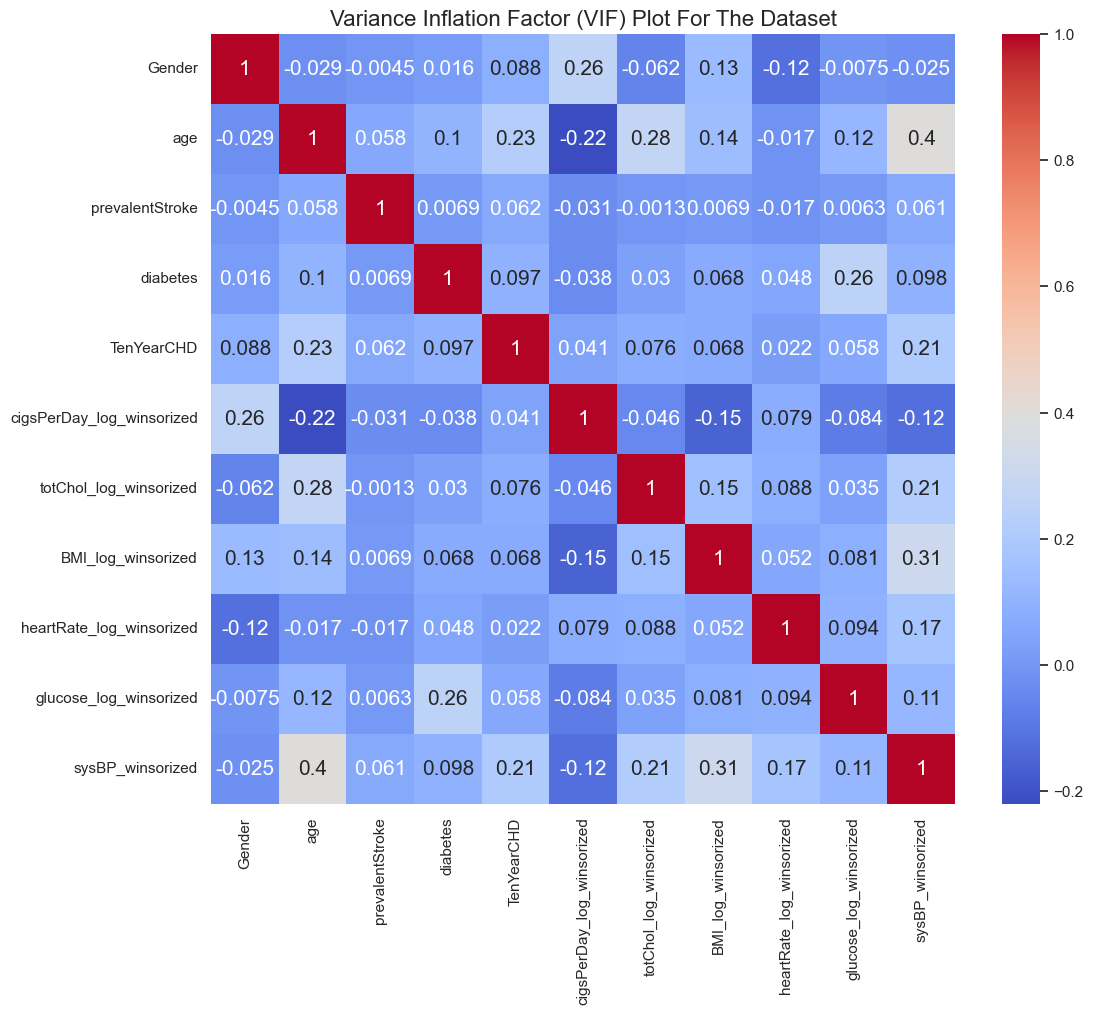

In [53]:
# 3.3 Correlation matrix
corr_matrix = transformed_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Variance Inflation Factor (VIF) Plot For The Dataset', fontsize=16) #Add title
plt.show()

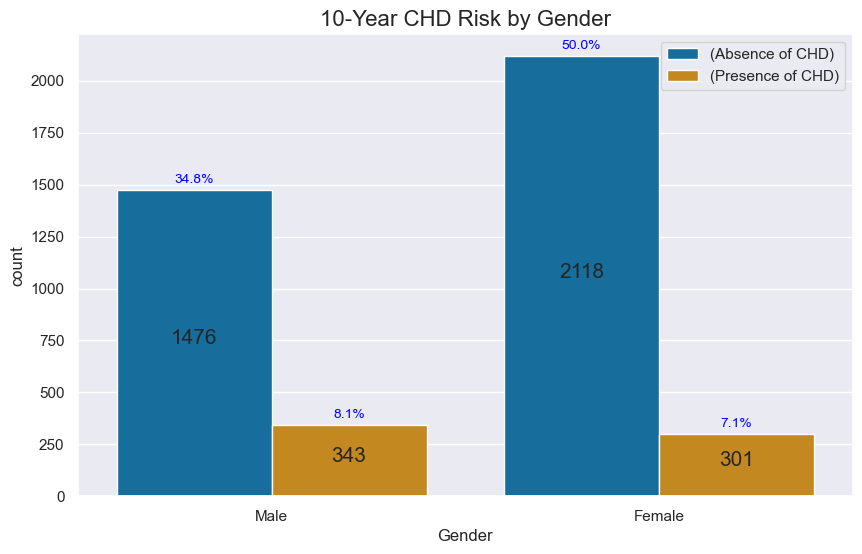

In [54]:
# 3.4 Relationship between features and CHD (target variable)
# Example:  Bar plots for categorical features, scatter plots for numerical features.
# Replace numerical gender values with labels
transformed_data['Gender'] = transformed_data['Gender'].replace({0: 'Female', 1: 'Male'})
# Create the countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender', hue='TenYearCHD', data=transformed_data)
plt.title('10-Year CHD Risk by Gender', fontsize=16) #Add title
# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['(Absence of CHD)', '(Presence of CHD)'])
# Add data labels (values and percentages)
total = len(transformed_data)
for p in ax.containers:
    ax.bar_label(p, label_type='center', padding=3) #add values
    for bar in p:
        height = bar.get_height()
        percentage = f'{100 * height/total:.1f}%'
        ax.annotate(percentage,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='blue')
plt.show()

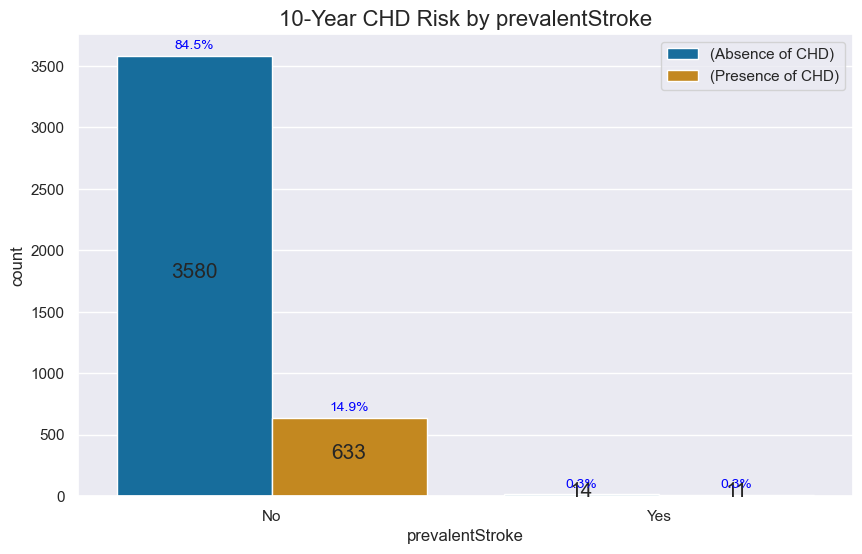

In [55]:
transformed_data['prevalentStroke'] = transformed_data['prevalentStroke'].replace({0: 'No', 1: 'Yes'})
# Create the countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(x='prevalentStroke', hue='TenYearCHD', data=transformed_data)
plt.title('10-Year CHD Risk by prevalentStroke', fontsize=16) #Add title
# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['(Absence of CHD)', '(Presence of CHD)'])
# Add data labels (values and percentages)
total = len(transformed_data)
for p in ax.containers:
    ax.bar_label(p, label_type='center', padding=3) #add values
    for bar in p:
        height = bar.get_height()
        percentage = f'{100 * height/total:.1f}%'
        ax.annotate(percentage,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='blue')
plt.show()

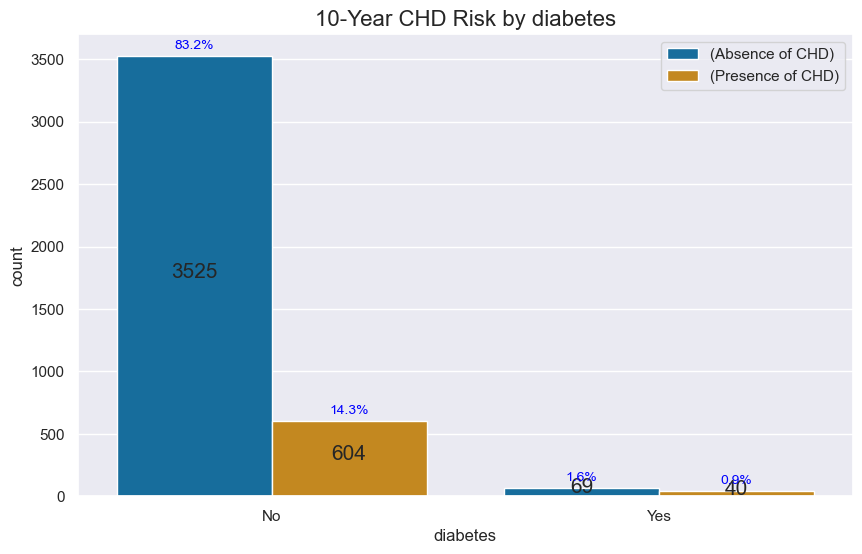

In [56]:
transformed_data['diabetes'] = transformed_data['diabetes'].replace({0: 'No', 1: 'Yes'})
# Create the countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(x='diabetes', hue='TenYearCHD', data=transformed_data)
plt.title('10-Year CHD Risk by diabetes', fontsize=16) #Add title
# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['(Absence of CHD)', '(Presence of CHD)'])
# Add data labels (values and percentages)
total = len(transformed_data)
for p in ax.containers:
    ax.bar_label(p, label_type='center', padding=3) #add values
    for bar in p:
        height = bar.get_height()
        percentage = f'{100 * height/total:.1f}%'
        ax.annotate(percentage,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='blue')
plt.show()

In [57]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     4238 non-null   object 
 1   age                        4238 non-null   float64
 2   prevalentStroke            4238 non-null   object 
 3   diabetes                   4238 non-null   object 
 4   TenYearCHD                 4238 non-null   int64  
 5   cigsPerDay_log_winsorized  4238 non-null   float64
 6   totChol_log_winsorized     4238 non-null   float64
 7   BMI_log_winsorized         4238 non-null   float64
 8   heartRate_log_winsorized   4238 non-null   float64
 9   glucose_log_winsorized     4238 non-null   float64
 10  sysBP_winsorized           4238 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 364.3+ KB


The object dtype indicates that these columns are currently treated as strings, not numerical values. Logistic regression requires numerical input for the predictor variables.

In [58]:
object_cols = ['Gender','prevalentStroke','diabetes']
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    transformed_data[col] = label_encoder.fit_transform(transformed_data[col])

In [59]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     4238 non-null   int32  
 1   age                        4238 non-null   float64
 2   prevalentStroke            4238 non-null   int32  
 3   diabetes                   4238 non-null   int32  
 4   TenYearCHD                 4238 non-null   int64  
 5   cigsPerDay_log_winsorized  4238 non-null   float64
 6   totChol_log_winsorized     4238 non-null   float64
 7   BMI_log_winsorized         4238 non-null   float64
 8   heartRate_log_winsorized   4238 non-null   float64
 9   glucose_log_winsorized     4238 non-null   float64
 10  sysBP_winsorized           4238 non-null   float64
dtypes: float64(7), int32(3), int64(1)
memory usage: 314.7 KB


In [60]:
transformed_data.iloc[:,[1,5,6,7,8,9,10]].describe()

,age,cigsPerDay_log_winsorized,totChol_log_winsorized,BMI_log_winsorized,heartRate_log_winsorized,glucose_log_winsorized,sysBP_winsorized
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,1.329903,5.449770,3.272601,4.327049,4.378414,131.539405
std,8.572160,1.445936,0.173953,0.135252,0.146549,0.145565,19.766443
min,32.000000,0.000000,4.682131,2.805782,3.806662,3.713572,83.500000
25%,42.000000,0.000000,5.332719,3.181382,4.234107,4.290459,117.000000
50%,49.000000,0.000000,5.459586,3.273364,4.330733,4.369448,128.000000
75%,56.000000,3.044522,5.572154,3.368588,4.430817,4.454347,144.000000
max,70.000000,3.433987,5.746203,3.519869,4.595120,4.682131,175.000000


In [61]:
############################################# Model Building: Logistic Regression ##############################################

In [62]:
from sklearn.feature_selection import RFE, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [63]:
#Data Splitting
X = transformed_data.drop('TenYearCHD', axis=1)
y = transformed_data['TenYearCHD']
#X = pd.get_dummies(X, drop_first=True) #One-hot encoding for categorical features.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Feature Scaling (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_with_constant = sm.add_constant(X_train) #Add constant for intercept
logreg_full_statsmodels = sm.Logit(y_train, X_train_with_constant).fit()
# Get the summary
summary = logreg_full_statsmodels.summary()
print(summary)


Optimization terminated successfully.
         Current function value: 0.382612
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3379
Method:                           MLE   Df Model:                           10
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.1072
Time:                        21:14:27   Log-Likelihood:                -1297.1
converged:                       True   LL-Null:                       -1452.8
Covariance Type:            nonrobust   LLR p-value:                 5.887e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9621      0.058    -33.754      0.000      -2.076      -1.848
x1             0.2290      0.

In [66]:
# Full Model
logreg_full = LogisticRegression(max_iter=1000) # Increase max_iter if convergence issues arise.
logreg_full.fit(X_train, y_train)
y_pred_full = logreg_full.predict(X_test)
y_prob_full = logreg_full.predict_proba(X_test)[:,1]

print("\nFull Model:")
print(classification_report(y_test, y_pred_full))
print(confusion_matrix(y_test, y_pred_full))



Full Model:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.05      0.09       124

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848

[[718   6]
 [118   6]]


[718, 6]: The model correctly predicted 718 instances of class 0 (true positives) and incorrectly predicted 6 instances of class 0 as class 1 (false negatives).
[118, 6]: The model correctly predicted 6 instances of class 1 (true positives) and incorrectly predicted 118 instances of class 1 as class 0 (false negatives).
The model has high accuracy (85%), but the recall for class 1 is very low (0.05). This indicates that the model is not doing a good job of identifying instances of class 1. The large difference in support (724 vs 124) suggests a class imbalance problem. The low recall for the minority class (class 1) is a significant concern. You might need to address class imbalance using techniques like oversampling, undersampling, or cost-sensitive learning to improve the model's performance on the minority class. The precision for class 1 is also low, indicating many false positives for this class.

In [128]:
#Stepwise Selection (using Recursive Feature Elimination)
selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8, step=1) # Adjust n_features_to_select as needed
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [129]:
logreg_stepwise = LogisticRegression(max_iter=1000)
logreg_stepwise.fit(X_train_selected, y_train)
y_pred_stepwise = logreg_stepwise.predict(X_test_selected)
y_prob_stepwise = logreg_stepwise.predict_proba(X_test_selected)[:,1]

In [131]:
print("\nStepwise Model (Top 8 Features):")
print("Selected Features:", selected_features)
print(classification_report(y_test, y_pred_stepwise))
print(confusion_matrix(y_test, y_pred_stepwise))


Stepwise Model (Top 8 Features):
Selected Features: Index(['Gender', 'age', 'prevalentStroke', 'diabetes',
       'cigsPerDay_log_winsorized', 'totChol_log_winsorized',
       'heartRate_log_winsorized', 'sysBP_winsorized'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.55      0.05      0.09       124

    accuracy                           0.85       848
   macro avg       0.70      0.52      0.51       848
weighted avg       0.81      0.85      0.80       848

[[719   5]
 [118   6]]


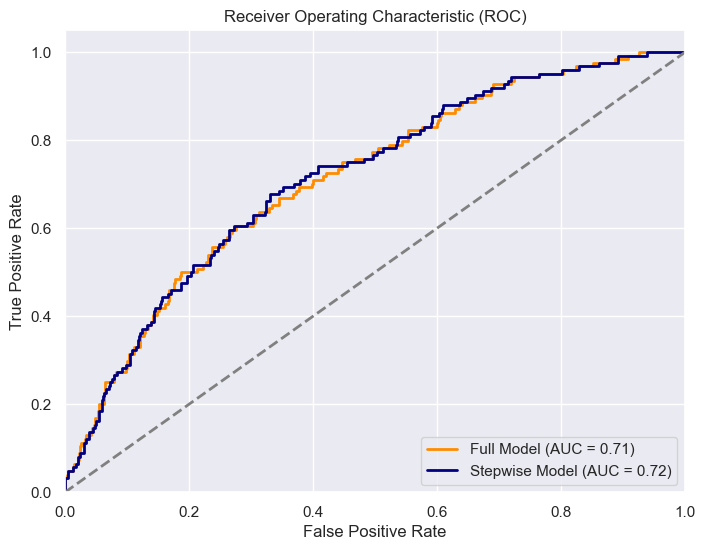

In [132]:
#6. ROC Curve and AUC

fpr_full, tpr_full, _ = roc_curve(y_test, y_prob_full)
roc_auc_full = auc(fpr_full, tpr_full)

fpr_stepwise, tpr_stepwise, _ = roc_curve(y_test, y_prob_stepwise)
roc_auc_stepwise = auc(fpr_stepwise, tpr_stepwise)

plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, color='darkorange', lw=2, label=f'Full Model (AUC = {roc_auc_full:.2f})')
plt.plot(fpr_stepwise, tpr_stepwise, color='navy', lw=2, label=f'Stepwise Model (AUC = {roc_auc_stepwise:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [133]:
#7. Model Comparison: Decision Tree

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)[:,1]

print("\nDecision Tree Model:")
print(classification_report(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))


Decision Tree Model:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       724
           1       0.23      0.22      0.23       124

    accuracy                           0.78       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.77      0.78      0.78       848

[[635  89]
 [ 97  27]]


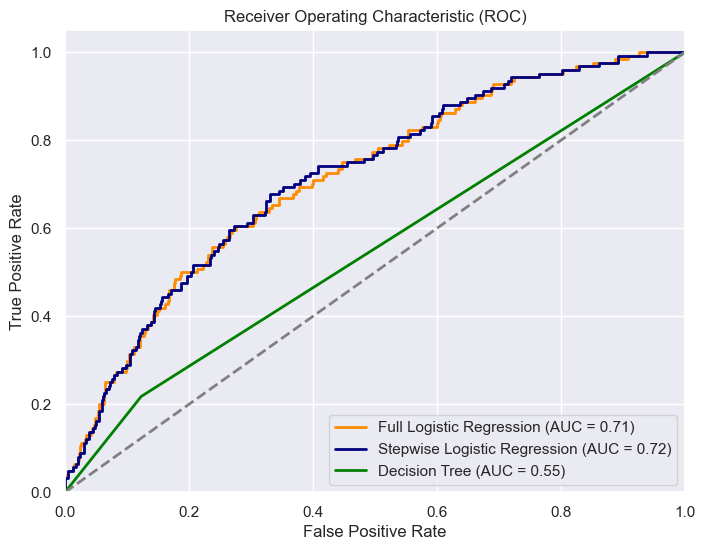

In [134]:
fpr_full, tpr_full, _ = roc_curve(y_test, y_prob_full)
roc_auc_full = auc(fpr_full, tpr_full)

fpr_stepwise, tpr_stepwise, _ = roc_curve(y_test, y_prob_stepwise)
roc_auc_stepwise = auc(fpr_stepwise, tpr_stepwise)

fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, color='darkorange', lw=2, label=f'Full Logistic Regression (AUC = {roc_auc_full:.2f})')
plt.plot(fpr_stepwise, tpr_stepwise, color='navy', lw=2, label=f'Stepwise Logistic Regression (AUC = {roc_auc_stepwise:.2f})')
plt.plot(fpr_dtree, tpr_dtree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [135]:
#Model Evaluation and Comparison

print("\nAccuracy Scores:")
print(f"Full Logistic Regression: {accuracy_score(y_test, y_pred_full):.2f}")
print(f"Stepwise Logistic Regression: {accuracy_score(y_test, y_pred_stepwise):.2f}")
print(f"Decision Tree: {accuracy_score(y_test, y_pred_dtree):.2f}")


Accuracy Scores:
Full Logistic Regression: 0.85
Stepwise Logistic Regression: 0.85
Decision Tree: 0.78
